# Import data

In [27]:
import pandas as pd

dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')

In [28]:
dfSolar2 = dfSolar.loc[:,["id","school_name","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]
dfSolar2.head()

,id,school_name,TodayKWH,kwh_kwp,Temp,PR,averageIrr,solarHour,INV_No,INV_Brand,INV_Type,Site_Capacity,PV_No,PV_W,PV_Brand,PV_Style
0,2947688,80102,201,2.24,25.9,79.64,275.66,10.20,18,Delta,5,90.0,360,250,NSP,WoDing
1,2942151,80102,322,3.58,26.8,71.74,474.40,10.51,18,Delta,5,90.0,360,250,NSP,WoDing
2,2936805,80102,212,2.35,26.2,77.27,294.22,10.36,18,Delta,5,90.0,360,250,NSP,WoDing
3,2931628,80102,241,2.67,27.1,73.52,345.68,10.52,18,Delta,5,90.0,360,250,NSP,WoDing
4,2926172,80102,263,2.92,26.5,75.54,365.89,10.58,18,Delta,5,90.0,360,250,NSP,WoDing


# Convert dummy variable (Encode Label)

In [29]:
dfSolar2["PV_Brand"].values

array(['NSP', 'NSP', 'NSP', ..., 'BenQ', 'BenQ', 'BenQ'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)
dfSolar2["PV_Brand"].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Pair plot by PV_Brand

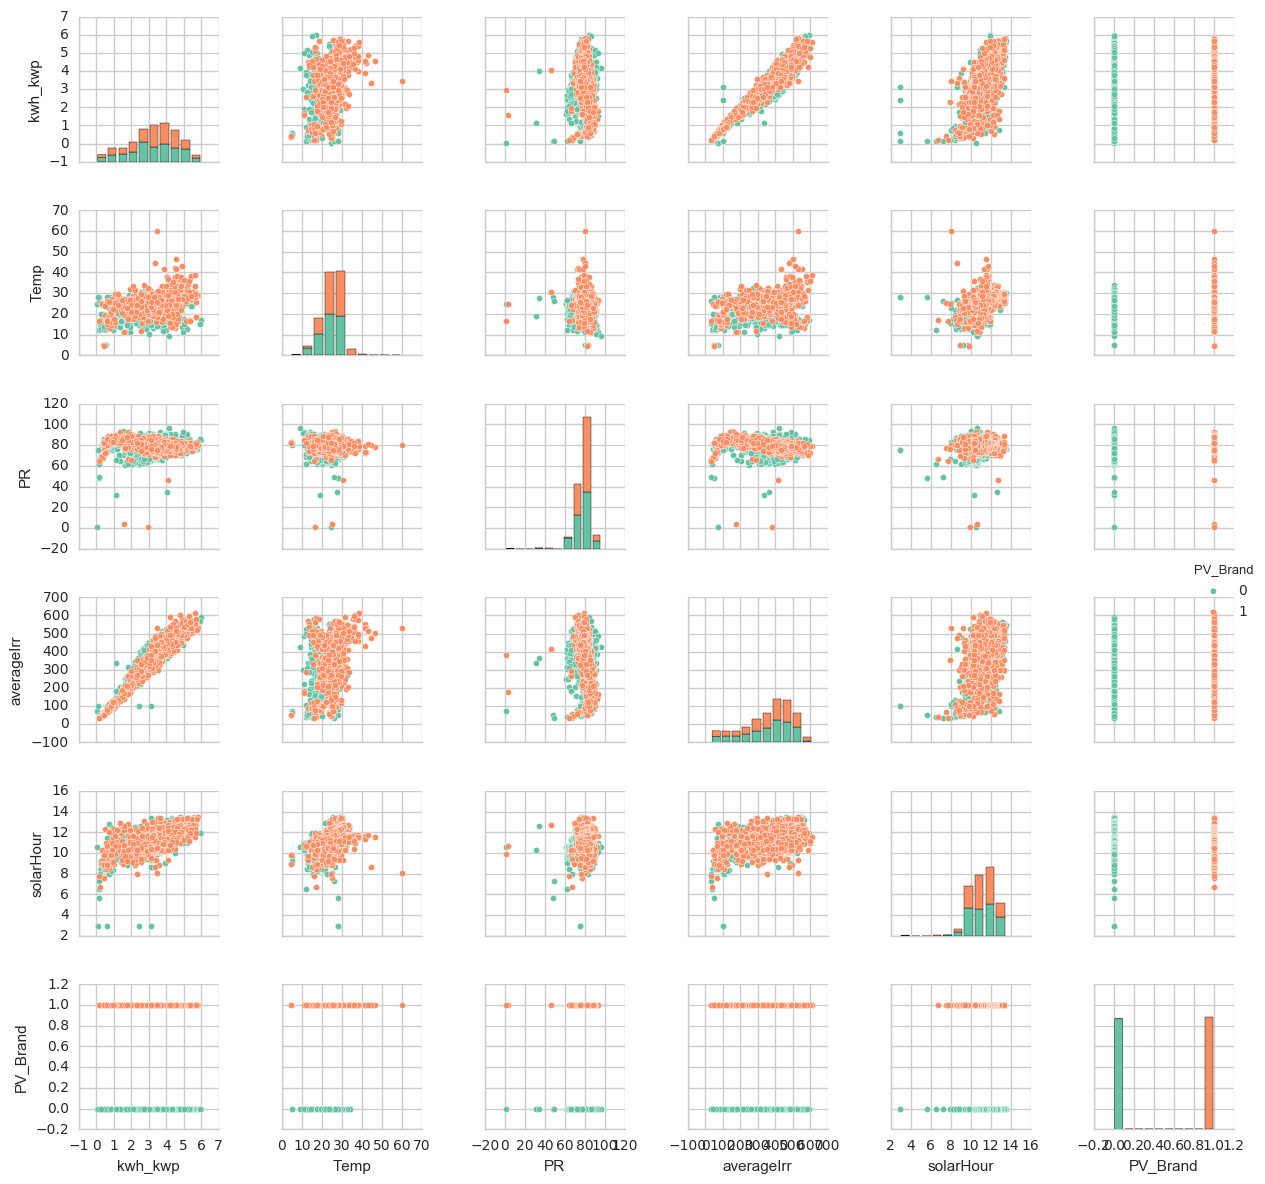

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]

sns.pairplot(dfSolar2[cols], size=2,hue="PV_Brand", palette="Set2"); # palette="husl" ; palette="GnBu_d"
plt.tight_layout()
plt.show()

# Corrleation Matrix and heat map

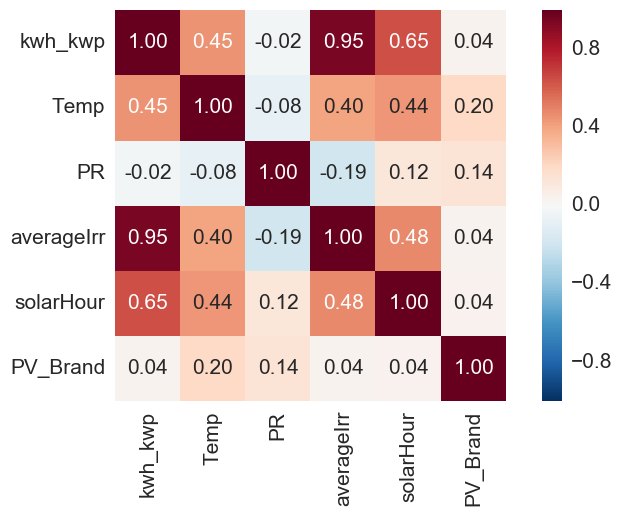

In [29]:
#若要P-value看下面這篇，有神人提供自己寫的Function
#http://stackoverflow.com/questions/24432101/correlation-coefficients-and-p-values-for-all-pairs-of-rows-of-a-matrix
#單純要get pvalue在Numpy 的package似乎是無法提供，要用另一個package:scipy
import numpy as np
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
cm = np.corrcoef(dfSolar2[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

In [30]:
# Corrleation and P-value
import scipy.spatial.distance as dist
import scipy.stats as ss
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]

# Pearson's correlation coefficients
#dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[0]))
dfcorrcoef = pd.DataFrame(dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[0])))
dfcorrcoef.rename(columns = {0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"},index ={0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"}, inplace=True)

# p-values
#dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[1]))
dfPvalues = pd.DataFrame(dist.squareform(dist.pdist(dfSolar2[cols].values.T, lambda x, y: ss.pearsonr(x, y)[1])))
dfPvalues.rename(columns = {0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"},index ={0:"kwh_kwp",1:"Temp",2:"PR",3:"averageIrr",4:"solarHour",5:"PV_Brand"}, inplace=True)

In [31]:
dfPvalues # Corrleation and P-value

,kwh_kwp,Temp,PR,averageIrr,solarHour,PV_Brand
kwh_kwp,0.000000e+00,1.221464e-68,3.665285e-01,0.000000e+00,2.307863e-164,1.870330e-01
Temp,1.221464e-68,0.000000e+00,3.101342e-03,7.951518e-55,1.532983e-66,2.115699e-13
PR,3.665285e-01,3.101342e-03,0.000000e+00,4.466609e-13,3.617957e-06,1.957340e-07
averageIrr,0.000000e+00,7.951518e-55,4.466609e-13,0.000000e+00,9.025168e-80,1.887883e-01
solarHour,2.307863e-164,1.532983e-66,3.617957e-06,9.025168e-80,0.000000e+00,1.463486e-01
PV_Brand,1.870330e-01,2.115699e-13,1.957340e-07,1.887883e-01,1.463486e-01,0.000000e+00


# 單變量簡單線性迴歸

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
#cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
cols = ["kwh_kwp","averageIrr"] #"solarHour"
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

mlr = LinearRegression()
mlr.fit(X, y)

print('Intercept: %.3f' % mlr.intercept_)
print('coef1: %.3f' % mlr.coef_[0])
#print('coef2: %.3f' % mlr.coef_[1])


Intercept: -0.113
coef1: 0.009


In [20]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.256e+04
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:43:19   Log-Likelihood:                -755.06
No. Observations:                1383   AIC:                             1514.
Df Residuals:                    1381   BIC:                             1525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1126      0.032     -3.479      0.0

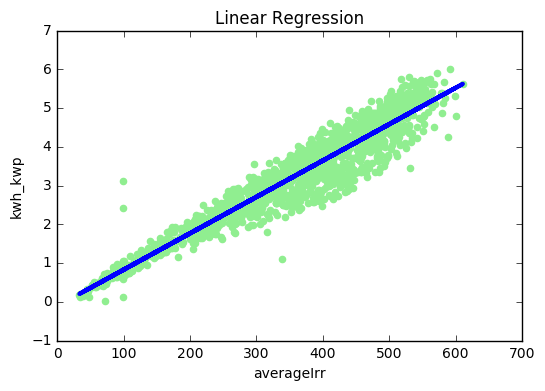

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
mlr = LinearRegression()
mlr.fit(X, y)

plt.scatter(X[:,0],y,color='lightgreen')
plt.plot(X, mlr.predict(X), color='blue',linewidth=3)
plt.xlabel("averageIrr")
plt.ylabel("kwh_kwp")
plt.title("Linear Regression")

plt.show()

# Fitting a robust regression model using RANSAC

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


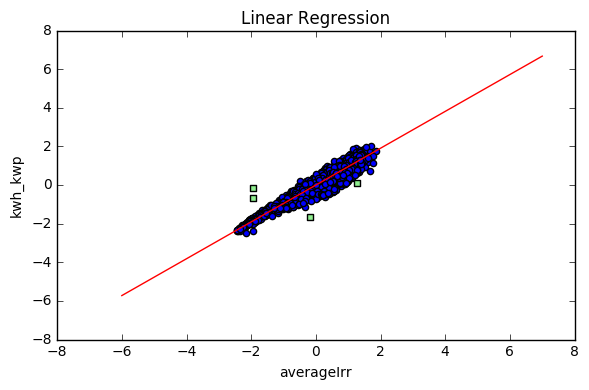

In [23]:
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=1000,  #迭代次數
                         min_samples=100,  #一開始選擇的隨機個數
                         residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
                         residual_threshold=1,   #自定義容許範圍
                         random_state=0)

cols = ["kwh_kwp","averageIrr"]
X, y = dfSolar2[[cols[1]]].values, dfSolar2[cols].iloc[:, 0].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)


ransac.fit(X_std, y_std)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(-6, 8, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X_std[inlier_mask], y_std[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X_std[outlier_mask], y_std[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel("averageIrr")
plt.ylabel("kwh_kwp")
plt.title("Linear Regression")


plt.tight_layout()
plt.show()

In [11]:
#y_std[inlier_mask]
X_std[inlier_mask]

array([[-0.64584081],
       [ 0.83580419],
       [-0.50747244],
       ..., 
       [-0.38572914],
       [ 0.21068628],
       [ 0.36172849]])

In [24]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_std[inlier_mask])
est = sm.OLS(y_std[inlier_mask], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 1.332e+04
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:44:00   Log-Likelihood:                -324.37
No. Observations:                1379   AIC:                             652.7
Df Residuals:                    1377   BIC:                             663.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0003      0.008     -0.033      0.9

# 多項式迴歸

In [31]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
#cols = ["kwh_kwp","PR","averageIrr","solarHour"]
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

mlr = LinearRegression()
mlr.fit(X, y)

print('Intercept: %.3f' % mlr.intercept_)
print('coef1: %.3f' % mlr.coef_[0])
print('coef2: %.3f' % mlr.coef_[1])
print('coef3: %.3f' % mlr.coef_[2])
print('coef4: %.3f' % mlr.coef_[3])
print('coef5: %.3f' % mlr.coef_[4])

Intercept: -4.230
coef1: 0.005
coef2: 0.023
coef3: 0.009
coef4: 0.226
coef5: -0.065


In [32]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     6971.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:46:28   Log-Likelihood:                -92.430
No. Observations:                1383   AIC:                             196.9
Df Residuals:                    1377   BIC:                             228.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.2297      0.097    -43.654      0.0

標準化後...

In [33]:
import statsmodels.api as sm
from scipy import stats
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

X2 = sm.add_constant(X)
est = sm.OLS(y_std, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     6971.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:46:31   Log-Likelihood:                 298.84
No. Observations:                1383   AIC:                            -585.7
Df Residuals:                    1377   BIC:                            -554.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.6662      0.073    -77.603      0.0

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


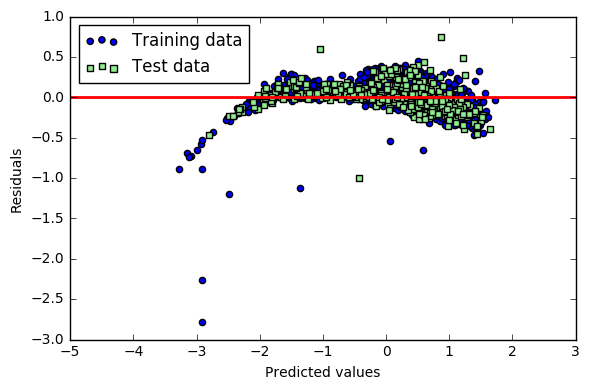

In [35]:
from sklearn.cross_validation import train_test_split

cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
#cols = ["kwh_kwp","PR","averageIrr","solarHour"]
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

#X_std=X
#y_std=y
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(
    X_std , y_std, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_std_train, y_std_train)
y_std_train_pred = slr.predict(X_std_train)
y_std_test_pred = slr.predict(X_std_test)

plt.scatter(y_std_train_pred,  y_std_train_pred - y_std_train, c='blue', marker='o', label='Training data')
plt.scatter(y_std_test_pred,  y_std_test_pred - y_std_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-5, xmax=3, lw=2, color='red')
plt.xlim([-5, 3])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_std_train, y_std_train_pred),
        mean_squared_error(y_std_test, y_std_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_std_train, y_std_train_pred),
        r2_score(y_std_test, y_std_test_pred)))

MSE train: 0.043, test: 0.030
R^2 train: 0.957, test: 0.970


# Using regularized methods for regression

未使用Lasso時

In [44]:
from sklearn.linear_model import LinearRegression

cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
#cols = ["kwh_kwp","PR","averageIrr","solarHour"]
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size=0.3, random_state=0)

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.075, test: 0.052
R^2 train: 0.957, test: 0.970


In [46]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4330.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        02:08:45   Log-Likelihood:                -122.10
No. Observations:                 968   AIC:                             256.2
Df Residuals:                     962   BIC:                             285.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.8283      0.119    -32.097      0.0

使用Lasso後

In [39]:
from sklearn.linear_model import Lasso

cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
#cols = ["kwh_kwp","PR","averageIrr","solarHour"]
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size=0.3, random_state=0)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

[ 0.00902121  0.02139448  0.00890854  0.11449654 -0.        ]
MSE train: 0.084, test: 0.077
R^2 train: 0.952, test: 0.956


In [40]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X_train[:,:-1])
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     5343.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:57:39   Log-Likelihood:                -128.52
No. Observations:                 968   AIC:                             267.0
Df Residuals:                     963   BIC:                             291.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.7971      0.120    -31.726      0.0

In [41]:
from sklearn.linear_model import ElasticNet
lasso = ElasticNet(alpha=1.0,l1_ratio=0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[ 0.01427402  0.0235386   0.00890591  0.10248193 -0.01424481]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# After a robust regression model using RANSAC

In [20]:
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=1000,  #迭代次數
                         min_samples=100,  #一開始選擇的隨機個數
                         residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
                         residual_threshold=1,   #自定義容許範圍
                         random_state=0)

cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

ransac.fit(X_std, y_std)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

#多項式無法畫圖，但可能還是需要找出adj R^2
#line_X = np.arange(3, 10, 1)
#line_y_ransac = ransac.predict(line_X[:, np.newaxis])
#plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
#plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
#plt.plot(line_X, line_y_ransac, color='red')   
#plt.xlabel('Average number of rooms [RM]')
#plt.ylabel('Price in $1000\'s [MEDV]')
#plt.legend(loc='upper left')

#plt.tight_layout()
#plt.show()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


In [21]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_std[inlier_mask])
est = sm.OLS(y_std[inlier_mask], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Wed, 31 May 2017   Prob (F-statistic):               0.00
Time:                        11:02:11   Log-Likelihood:                 632.97
No. Observations:                1379   AIC:                            -1254.
Df Residuals:                    1373   BIC:                            -1223.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0065      0.004     -1.583      0.1

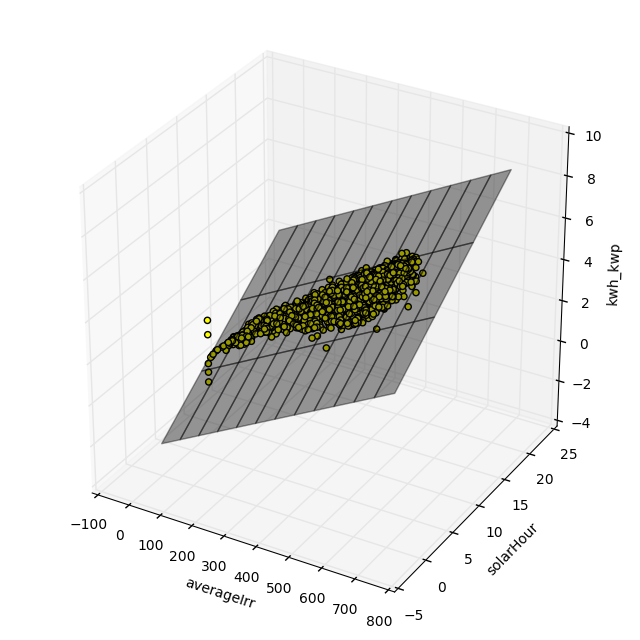

In [18]:
#https://stackoverflow.com/questions/26431800/plot-linear-model-in-3d-with-matplotlib
#http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_3d.html#sphx-glr-auto-examples-linear-model-plot-ols-3d-py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

#csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='kwh_kwp ~ averageIrr + solarHour', data = dfSolar2.loc[:,["kwh_kwp","PR","averageIrr","solarHour"]])
#model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 750, 30)# generate a mesh
y_surf = np.arange(0, 25, 7)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'averageIrr': x_surf.ravel(), 'solarHour': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=2,
                color='None',
                alpha = 0.4)

ax.scatter(dfSolar2['averageIrr'], dfSolar2['solarHour'], dfSolar2['kwh_kwp'],
           c='yellow',
           marker='o',
           alpha=1)

ax.set_xlabel('averageIrr')
ax.set_ylabel('solarHour')
ax.set_zlabel('kwh_kwp')

plt.show()

# PCA & PCA regression

In [3]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#cols = ["Temp","PR","averageIrr","solarHour","PV_Brand"]
cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour"]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#X_std = sc.fit_transform(X)
#X_train_std = sc.fit_transform(X_train)
#X_test_std = sc.fit_transform(X_test)

corr_mat = np.corrcoef(X.T) # 計算相關係數矩陣
#cov_mat = np.cov(X_std.T) # 計算共變異數矩陣
eigen_vals, eigen_vecs = np.linalg.eig(corr_mat) # 分解為特徵值(eigen_vals), 特徵向量(eigen_vecs)

print('\nEigenvalues \n%s' % eigen_vals) # 特徵值
# 計算解釋變異數比率
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # 特徵值由大到小排序
cum_var_exp = np.cumsum(var_exp) # 特徵值 -> 變異數解釋能力
print('\nCumulative Variance: ' + str(cum_var_exp))


Eigenvalues 
[ 1.88841136  0.60307438  0.42487535  1.08363892]

Cumulative Variance: [ 0.47210284  0.74301257  0.89378116  1.        ]


C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


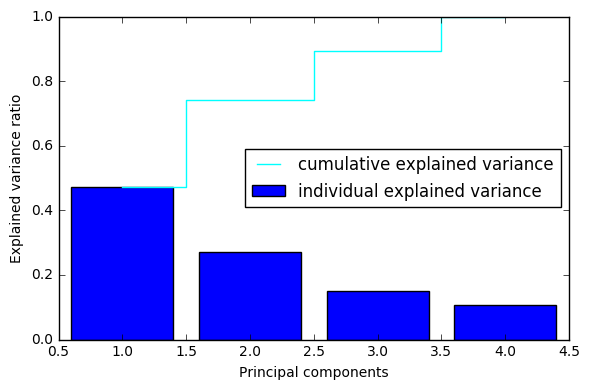

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 5), var_exp, alpha=1, align='center', color = "b",
        label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', color = "aqua",
         label='cumulative explained variance') # 階梯線 累加特徵值解釋能力
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

[ 0.47210284  0.27090973]


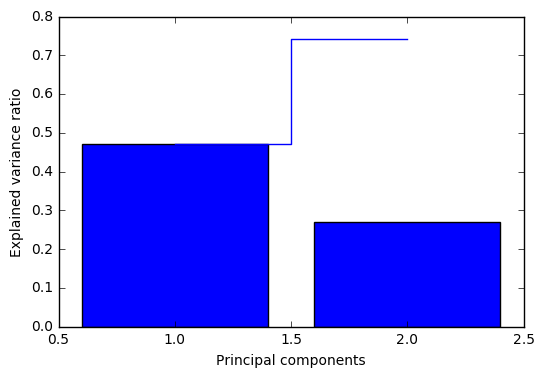

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# explained_variance_ratio_ 屬性: 計算主成份的解釋變異率

X_std = sc.fit_transform(X)
pca = PCA(n_components=2)
#X_pca = pca.fit_transform(corr_mat)
X_pca = pca.fit_transform(X_std)
#Get the components from transforming the original data.
#scores = pca.transform(X_std)
print(pca.explained_variance_ratio_)

# 繪製 主成份解釋變異圖, 顯示特徵值解釋能力
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [7]:
# 兩個Components的迴歸
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(-X_pca)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1962.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:06:40   Log-Likelihood:                -1422.7
No. Observations:                1383   AIC:                             2851.
Df Residuals:                    1380   BIC:                             2867.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.2893      0.018    180.516      0.0

# PCA Regression 3D plots

In [8]:
dfPCA = pd.DataFrame({'Comp1': pd.DataFrame(-X_pca)[0],'Comp2': pd.DataFrame(-X_pca)[1], "kwh_kwp": y})
dfPCA.head()

,Comp1,Comp2,kwh_kwp
0,-0.727266,-0.049610,2.24
1,0.491052,-1.267588,3.58
2,-0.506251,-0.339998,2.35
3,-0.057391,-0.855032,2.67
4,-0.034053,-0.603957,2.92


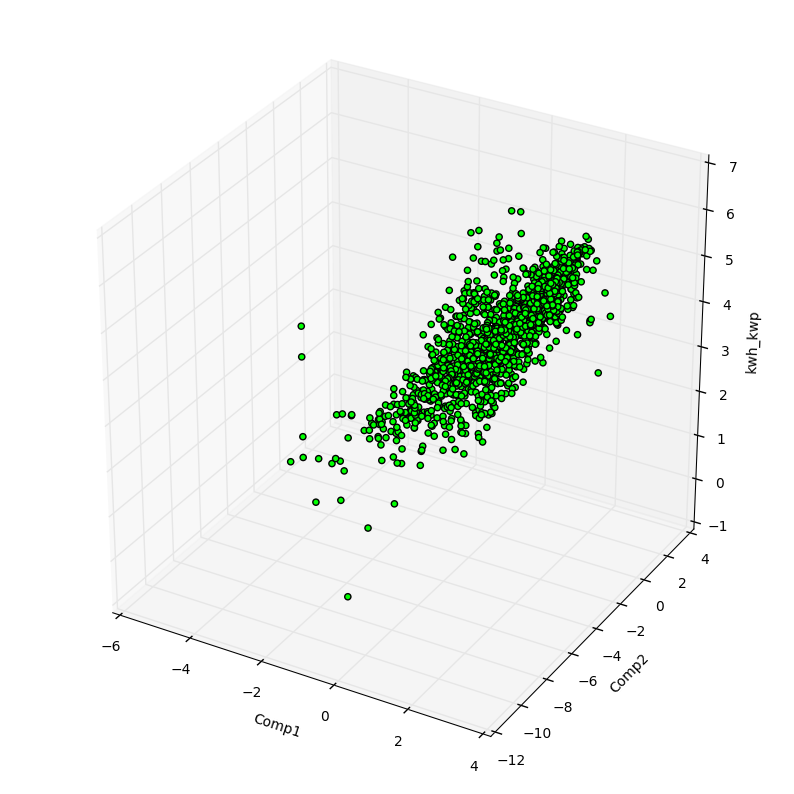

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

#csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='kwh_kwp ~ Comp1 + Comp2', data = dfPCA)
#model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 10, 10)# generate a mesh
y_surf = np.arange(0, 10, 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Comp1': x_surf.ravel(), 'Comp2': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=2,
                color='None',
                alpha = 0.4)

ax.scatter(dfPCA['Comp1'], dfPCA['Comp2'], dfPCA['kwh_kwp'],
           c='lime',
           marker='o',
           alpha=1)

ax.set_xlabel('Comp1')
ax.set_ylabel('Comp2')
ax.set_zlabel('kwh_kwp')

plt.show()

# 3 Components multiple regression

[ 0.47210284  0.27090973  0.15076859]


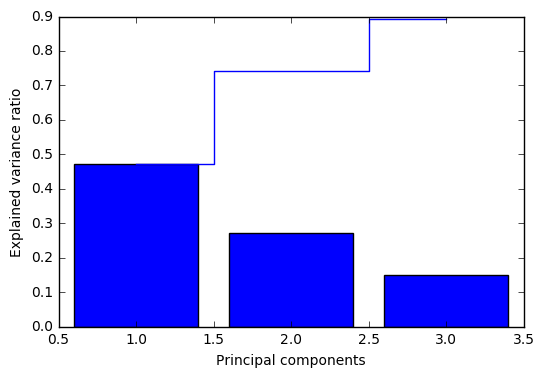

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# explained_variance_ratio_ 屬性: 計算主成份的解釋變異率

X_std = sc.fit_transform(X)
pca = PCA(n_components=3)
#X_pca = pca.fit_transform(corr_mat)
X_pca = pca.fit_transform(X_std)
#Get the components from transforming the original data.
#scores = pca.transform(X_std)
print(pca.explained_variance_ratio_)

# 繪製 主成份解釋變異圖, 顯示特徵值解釋能力
plt.bar(range(1, 4), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance', color ="b")
plt.step(range(1, 4), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_pca, y)

print('Intercept: %.3f' % mlr.intercept_)
print('coef1: %.3f' % -mlr.coef_[0])
print('coef2: %.3f' % -mlr.coef_[1])
print('coef3: %.3f' % -mlr.coef_[2])

Intercept: 3.289
coef1: 0.830
coef2: 0.026
coef3: 0.671


In [12]:
# 三個Components的迴歸
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(-X_pca)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     3874.
Date:                Thu, 01 Jun 2017   Prob (F-statistic):               0.00
Time:                        01:10:22   Log-Likelihood:                -802.14
No. Observations:                1383   AIC:                             1612.
Df Residuals:                    1379   BIC:                             1633.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.2893      0.012    282.639      0.0

In [6]:
import pandas as pd
dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","school_name","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]

cols = ["kwh_kwp","Temp","PR","averageIrr","solarHour"]
X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

# 採用Pipeline

In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","school_name","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)
dfSolar2["PV_Style"] = class_le.fit_transform(dfSolar2["PV_Style"].values)

cols = ["Temp","PR","averageIrr","solarHour","PV_Brand","PV_Style"]
X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('glm', LinearRegression(n_jobs=1))])

pipe.fit(X, y)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('glm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [ ]:
#Pipeline 使用pipline的圖表呢???



# 集群Cluster
    --2D
    --3D

In [8]:
import pandas as pd
dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","school_name","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]

In [9]:
dfSolar2.loc[:,["school_name","kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]].head()

,school_name,kwh_kwp,Temp,PR,averageIrr,solarHour,PV_Brand
0,80102,2.24,25.9,79.64,275.66,10.20,NSP
1,80102,3.58,26.8,71.74,474.40,10.51,NSP
2,80102,2.35,26.2,77.27,294.22,10.36,NSP
3,80102,2.67,27.1,73.52,345.68,10.52,NSP
4,80102,2.92,26.5,75.54,365.89,10.58,NSP


In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
class_le = LabelEncoder()

cols = ["school_name","kwh_kwp","Temp","PR","averageIrr","solarHour"]
#dfSolar2["school_name"] = class_le.fit_transform(dfSolar2[cols].loc[:,["school_name"]].values)
#dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2[cols].loc[:,["PV_Brand"]].values)
#dfSolar2["PV_Style"] = class_le.fit_transform(dfSolar2[cols].loc[:,["PV_Style"]].values)
X, y = dfSolar2[cols].iloc[:,1:].values , dfSolar2[cols].iloc[:, 0].values

In [11]:
X

array([[   2.24,   25.9 ,   79.64,  275.66,   10.2 ],
       [   3.58,   26.8 ,   71.74,  474.4 ,   10.51],
       [   2.35,   26.2 ,   77.27,  294.22,   10.36],
       ..., 
       [   2.09,   23.3 ,   64.76,  310.55,    9.8 ],
       [   2.64,   22.1 ,   64.84,  390.55,    9.86],
       [   2.73,   23.6 ,   66.46,  410.81,    9.88]])

In [12]:
#看averageIrr:平均日照強度 , solarHour:日照時數 對案場的分群是否有明顯的2群或4群?
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

In [13]:
y_km

array([1, 2, 1, ..., 1, 1, 1])

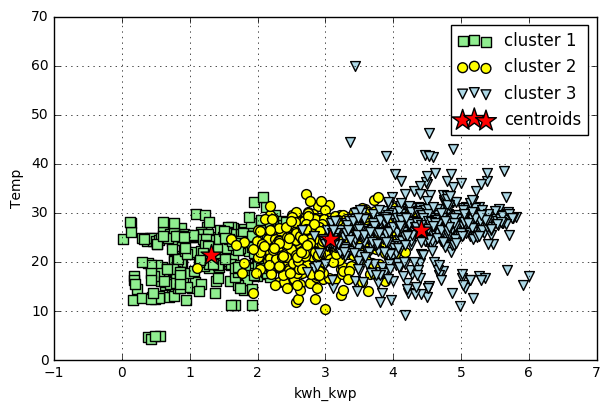

[ 1.30562278  3.0740396   4.40509213]
[ 21.54270463  24.66693069  26.55125628]


In [16]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='yellow', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
#plt.scatter(X[y_km==3,0], 
#            X[y_km==3,1], 
#            s=50, 
#            c='lightyellow', 
#            marker='D', 
#            label='cluster 4')
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')

plt.grid()
plt.legend()
plt.tight_layout()
plt.xlabel('kwh_kwp')
plt.ylabel('Temp')
plt.show()

print(km.cluster_centers_[:,0])
print(km.cluster_centers_[:,1])

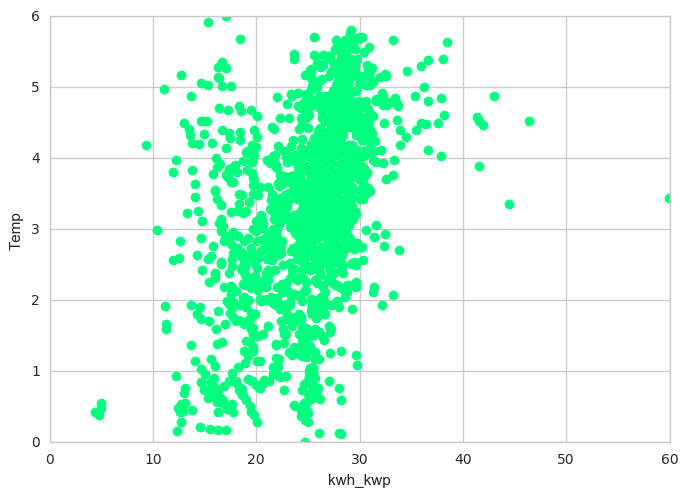

In [31]:
import matplotlib.pyplot as plt
cols = ["kwh_kwp","Temp"]

x, y = dfSolar2[cols].iloc[:,1].values , dfSolar2[cols].iloc[:, 0].values

plt.plot(x, y, "o", color="springgreen")
plt.ylabel('Temp')
plt.xlabel('kwh_kwp')
plt.show()

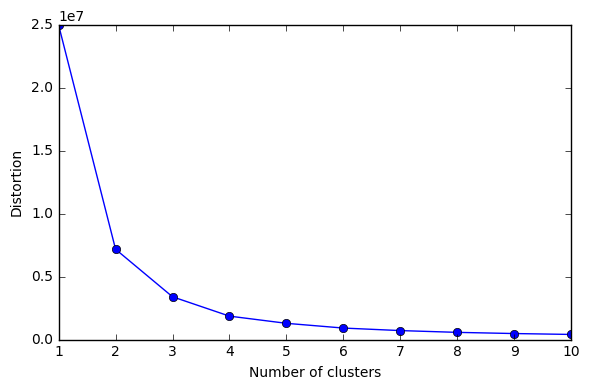

In [17]:
estimator = km.fit(X)
#estimator.labels_
#{i: np.where(estimator.labels_ == i)[0] for i in range(estimator.n_clusters)}
#{i: X[np.where(estimator.labels_ == i)] for i in range(estimator.n_clusters)}

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions .append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

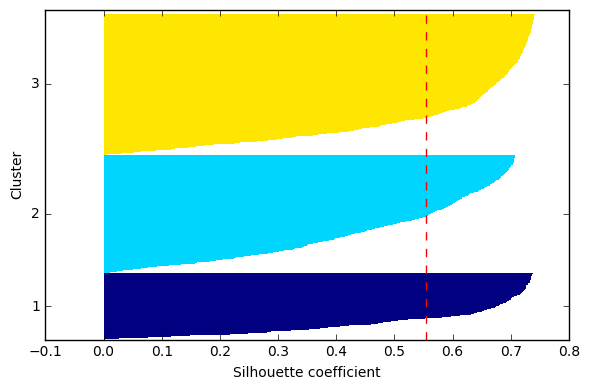

In [18]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples #計算silhouette分數 0~1之間 越接近0代表此樣本分得不好

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]                #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #歐式距離 
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

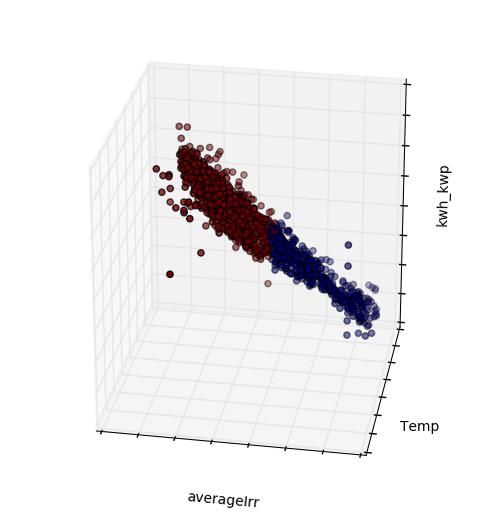

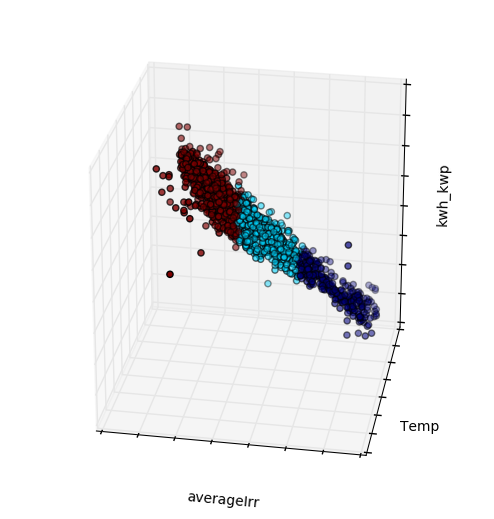

In [24]:
#http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
#http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

#centers = [[1, 1], [-1, -1], [1, -1]]
#centers = pca.inverse_transform(kmeans.cluster_centers_)

class_le = LabelEncoder()
dfSolar2["PV_Brand"] = class_le.fit_transform(dfSolar2["PV_Brand"].values)
#dfSolar2["PV_Style"] = class_le.fit_transform(dfSolar2["PV_Style"].values)
#cols = ["Temp","PR","averageIrr","solarHour","PV_Brand","PV_Style"]
cols = ["school_name","kwh_kwp","Temp","PR","averageIrr","solarHour","PV_Brand"]
X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values

estimators = {'k_means_Solar_2': KMeans(n_clusters=2,init='k-means++'),
              'k_means_Solar_3': KMeans(n_clusters=3,init='k-means++')}

#estimators = {'k_means_iris_2': KMeans(n_clusters=2),
#              'k_means_iris_3': KMeans(n_clusters=3),
#              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
#                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(5, 5))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=25, azim=100)

    plt.cla()
    est.fit(X)
    labels = est.labels_
    
    #Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
    y = np.choose(labels, [0, 11, 33]).astype(np.float)
    ax.scatter(X[:, 3], X[:, 1], X[:, 0],  c=y)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('averageIrr')
    ax.set_ylabel('Temp')
    ax.set_zlabel('kwh_kwp')
    fignum = fignum + 1

# Plot the ground truth
#fig = plt.figure(fignum, figsize=(4, 3))
#plt.clf()
plt.show()


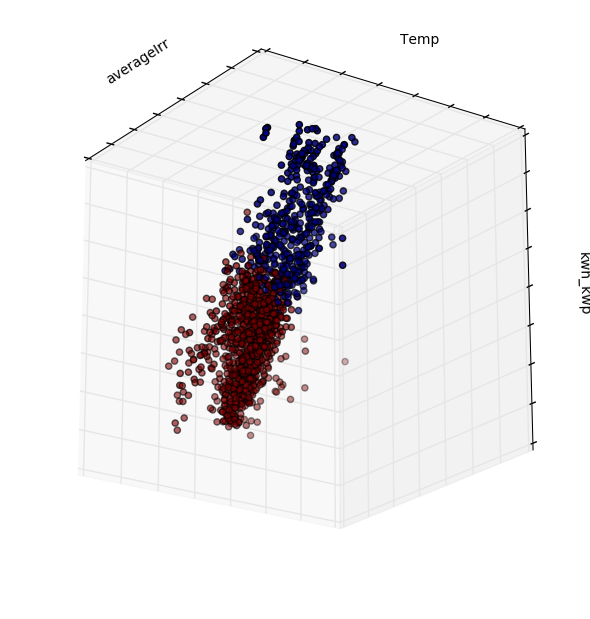

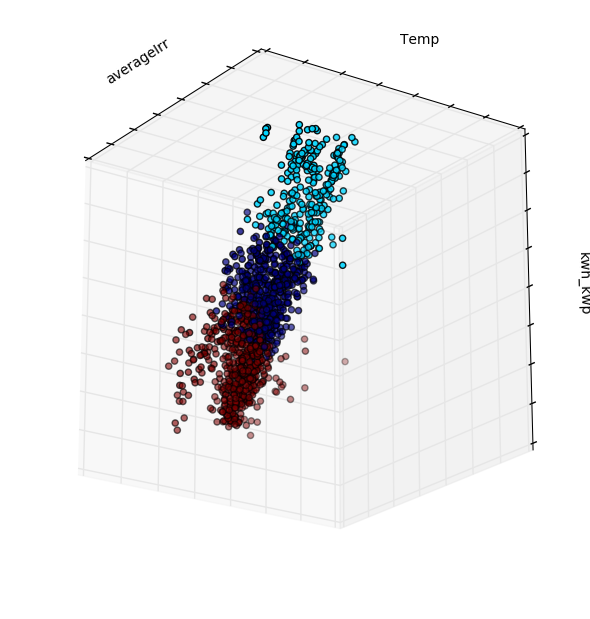

In [80]:
#------------------------------------換個角度看看-----------------------------------------------#
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(6, 6))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=160, azim=35)

    plt.cla()
    est.fit(X)
    labels = est.labels_
    
    #Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)
    y = np.choose(labels, [0, 11, 33]).astype(np.float)
    ax.scatter(X[:, 3], X[:, 1], X[:, 0],  c=y)
    #ax.scatter(X[:, 3], X[:, 1], X[:, 0], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('averageIrr')
    ax.set_ylabel('Temp')
    ax.set_zlabel('kwh_kwp')
    fignum = fignum + 1

# Plot the ground truth
#fig = plt.figure(fignum, figsize=(4, 3))
#plt.clf()
plt.show()


In [25]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

import numpy as np

cols = ["Temp", "PR", "averageIrr", "solarHour"]
labels = dfSolar2["id"].values
df = pd.DataFrame(dfSolar.loc[:,["Temp", "PR", "averageIrr", "solarHour"]].values, columns = cols, index = labels)
df.head()

,Temp,PR,averageIrr,solarHour
2947688,25.9,79.64,275.66,10.20
2942151,26.8,71.74,474.40,10.51
2936805,26.2,77.27,294.22,10.36
2931628,27.1,73.52,345.68,10.52
2926172,26.5,75.54,365.89,10.58


In [26]:
row_dist = pd.DataFrame(squareform(pdist(df, metric = "euclidean")), columns = labels, index = labels)
row_dist.head()

,2947688,2942151,2936805,2931628,2926172,2920815,2915438,2910065,2904549,2899217,...,1175802,1170622,1165837,1160944,1156017,1151156,1146214,1141270,1136329,1131432
2947688,0.000000,198.899230,18.713794,70.297917,90.325895,63.319904,150.022444,95.235262,149.380017,45.557007,...,94.766065,37.124338,109.791711,60.537771,46.049779,14.622743,112.382523,38.021658,115.902147,135.810998
2942151,198.899230,0.000000,180.265903,128.732657,108.576954,135.582457,48.890125,103.668804,49.686836,244.372216,...,292.479110,235.904658,90.072086,259.244139,155.587962,210.793844,87.593756,164.037487,84.267105,63.892123
2936805,18.713794,180.265903,0.000000,51.604551,71.691842,44.694157,131.383366,76.625292,130.793723,64.264340,...,112.891008,55.681297,91.112490,79.054049,28.223019,31.237649,93.711172,20.782026,97.216428,117.119915
2931628,70.297917,128.732657,51.604551,0.000000,20.319648,7.525198,79.860084,25.350527,79.400264,115.842060,...,163.944949,107.242119,39.880570,130.569839,28.721548,82.172218,42.520016,36.411714,45.979288,65.608080
2926172,90.325895,108.576954,71.691842,20.319648,0.000000,27.006423,59.700939,5.052415,59.149550,135.824900,...,184.193802,127.344868,21.237472,150.701668,48.316277,102.379987,23.779418,56.476299,27.248560,45.925514


In [27]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values, method = 'complete', metric = 'euclidean')
pd.DataFrame(row_clusters, 
             columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index = ["cluster %d" %(i+1) for i in range(row_clusters.shape[0])]).head()

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,1284.0,1285.0,0.000000,2.0
cluster 2,1286.0,1383.0,0.000000,3.0
cluster 3,1287.0,1384.0,0.000000,4.0
cluster 4,351.0,356.0,0.285132,2.0
cluster 5,65.0,418.0,0.294958,2.0


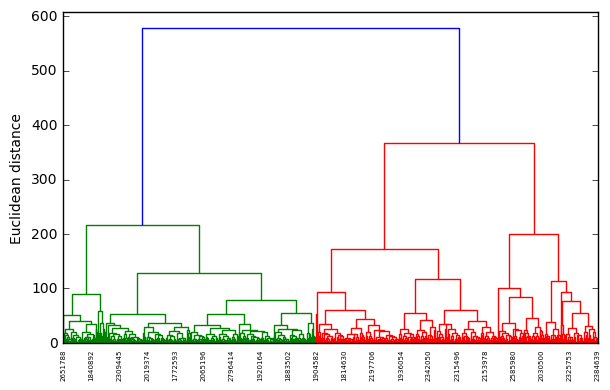

In [28]:
# 樹狀圖
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.xticks(np.linspace(0, 13840, 20, endpoint=True))
plt.ylabel('Euclidean distance')
plt.show()
# 樹狀圖加上以上方法，可以看出分三群是最好的狀況。

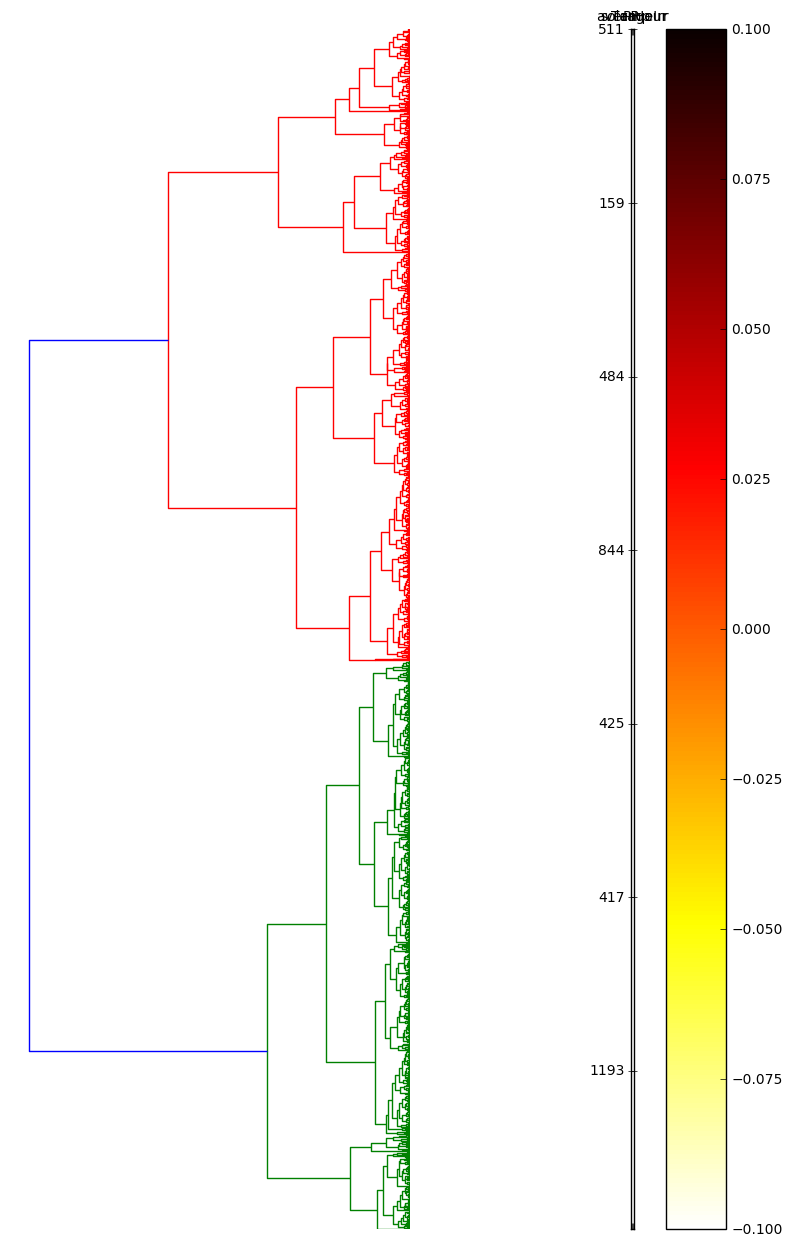

In [32]:
# plot row dendrogram
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.5,1.5]) #設定X Y 軸 位置 寬度 高度 
row_dendr = dendrogram(row_clusters, orientation='left') #right 將樹狀圖以逆時針轉90度

# reorder data with respect to clustering
#df_rowclust 原始的資料集
#dendrogram樹狀圖物件本身是個字典的leaves鍵，藉此可以讀到集群標籤
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axd.set_xticks([]) 
axd.set_yticks([]) 
#移除掉軸的刻度以便修改熱度圖的顏色
# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23,0.1,0.8,1.5]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r') #將重新排列的dataframe把入熱度圖
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

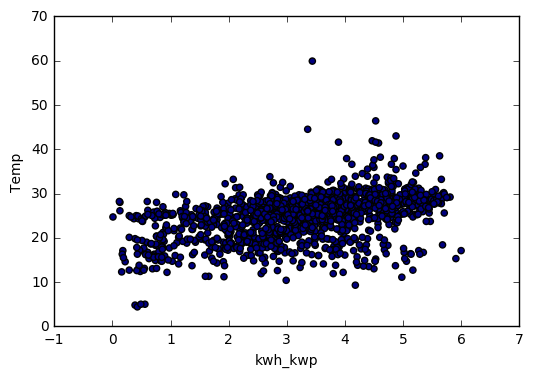

In [5]:
#使用Kmeans一定會依照我們設定的群數去分，但實際上此圖形有很大的可能就只是一群!
#所以我們改採用密度的方式畫圖就可以很自然得出同一群的結論
from sklearn.cluster import DBSCAN
#那麼如果使用DBSCAN效果如何呢？我們先不調參，直接用默認參數 半徑0.5 最小包含5
#y_pred = DBSCAN().fit_predict(X)
#那麼我們可以減少ϵ ϵ-鄰域的大小，默認是0.5，我們減到0.1
#y_pred = DBSCAN(eps = 0.1).fit_predict(X)
#調參增加類別，有兩個方向都是可以的，一個是繼續減少eps，另一個是增加min_samples。我們現在將min_samples從默認的5增加到10，
y_pred = DBSCAN(eps = 0.7, min_samples = 11).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.ylabel('Temp')
plt.xlabel('kwh_kwp')
plt.show()

# Prediction & Residuals eval

In [10]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

dfSolar = pd.read_csv('C:/Data/T102_103_301_401_3.csv', encoding = 'utf-8')
dfSolar2 = dfSolar.loc[:,["id","TodayKWH","kwh_kwp","Temp","PR","averageIrr","solarHour","INV_No","INV_Brand","INV_Type","Site_Capacity","PV_No","PV_W","PV_Brand","PV_Style"]]

cols = ["kwh_kwp","PR","averageIrr","solarHour"]
X, y = dfSolar2[cols].iloc[:, 2:].values, dfSolar2[cols].iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

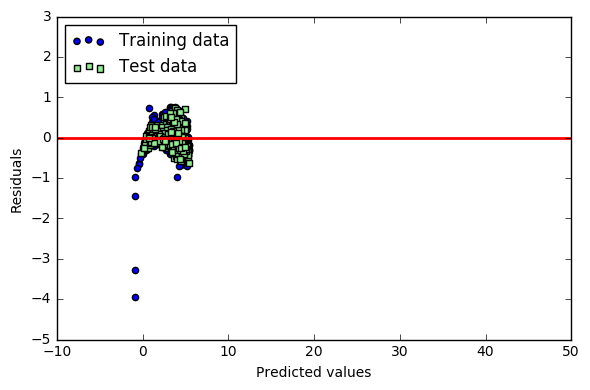

In [13]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

In [16]:
#預測 補!!!
cols = ["kwh_kwp","PR","averageIrr","solarHour"]
dfSolar2[cols]

X, y = dfSolar2[cols].iloc[:, 1:].values, dfSolar2[cols].iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print('Intercept: %.3f' % mlr.intercept_)
print('coef1: %.3f' % mlr.coef_[0])
print('coef2: %.3f' % mlr.coef_[1])
print('coef3: %.3f' % mlr.coef_[2])
#print('coef4: %.3f' % mlr.coef_[3])
#print('coef5: %.3f' % mlr.coef_[4])

pd.DataFrame({'$Predict': y_pred,'$TestData': y_test}).head()

Intercept: -3.708
coef1: 0.020
coef2: 0.009
coef3: 0.208


,$Predict,$TestData
0,1.671024,1.60
1,4.059748,4.18
2,3.404020,3.46
3,4.329193,3.97
4,2.761231,2.83
